In [32]:
using Plots
using LaTeXStrings

# Modelo de Hodgkin-Huxley

## *Gissel Juárez Olivos*

El modelo de Hodgkin-Huxley fue propuesto en 1952 tras haber estudiado la fisiología del axón gigante del calamar y marcó un hito en historia de la neurociencia, a partir de ese momento muchos modelos se han desarrollado tomándolo como base. En su forma clásica el modelo se define como un sistema de cuatro equaciones diferenciales como se muestra a continuación:

\begin{align*}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) \\
                   &- g_L (V - E_L) + I_{ext} \\
 \frac{1}{\gamma(T)} \frac{dn}{dt} &= \alpha_n(V) (1 - n) - \beta_n(V)n = \frac{n^{\infty}(V) - n}{\tau_n(V)} \\
 \frac{1}{\gamma(T)} \frac{dm}{dt} &= \alpha_m(V) (1 - m) - \beta_m(V)m = \frac{m^{\infty}(V) - m}{\tau_m(V)} \\
 \frac{1}{\gamma(T)} \frac{dh}{dt} &= \alpha_h(V) (1 - h) - \beta_h(V)h = \frac{h^{\infty}(V) - h}{\tau_h(V)} \\
 \tau_n(V) &= \frac{1}{\alpha_n(V) + \beta_n(V)} \\
 n_{\infty}(V) &= \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}
\end{align*}

en donde:
* $V$ la diferencia de potencial en la membrana
* $C_m = 1.0\ \mu\text{F/cm}^2$ la capacitancia de la membrana por unidad de área
* $g_{Na} = 120\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el sodio
* $g_{K} = 36\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el potasio
* $g_{L} = 0.3\ \text{mS/cm}^2$ la conductancia adicional, independiente del voltaje
* $E_{Na} = 55\ \text{mV}$ el voltaje de la batería en la compuerta de sodio
* $E_{K} = -72\ \text{mV}$ el voltaje de la batería en la compuerta de potasio
* $E_{L} = -49.387\ \text{mV}$ el voltaje filtrado
* $\gamma(T)$ es una constante de proporcionalidad temporal que depende de la temperatura $T$, a $6.3°$C vale $1$ [Cessac2009].

para el caso del calamar.  Los potenciales están medidos considerando que la membrana se encuentra en su potencial de reposo a los $V_r = -60\ \text{mV}$.  Las corrientes $I$ están medidas en $\mu$A/cm$^2$.

Las funciones de transición $\alpha(V)$ y $\beta(V)$, fueron determinadas experimentalmente.  Su forma general es:
\begin{align}
  \alpha(V) \text{ ó } \beta(V) = \frac{A + BV}{C + H e^{\left(\frac{V+D}{F}\right)}}
\end{align}
donde $V$ está medido con respecto al potencial de reposo $V_r$.

Los valores medidos por Hodkin y Huxley para la compuerta de **potasio (K)**, fueron:

\begin{align}
  \alpha_n(V) &= \frac{0.01(10 - V)}{e^{\left(\frac{10-V}{10}\right)} - 1}
\end{align}

\begin{align}
  \beta_n(V) = 0.125 e^{-\frac{V}{80}}
\end{align}

Observemos que cuando $V = 10$ la función $\alpha_n$ está indefinida.  Utilizando la regla de L'Hopital, se calcula el límite:
\begin{align}
  \alpha_n(10) = \frac{-0.01}{e^{\left(\frac{10-V}{10}\right)}(-0.1)} = \frac{-0.01}{-0.1} = 0.1
\end{align}

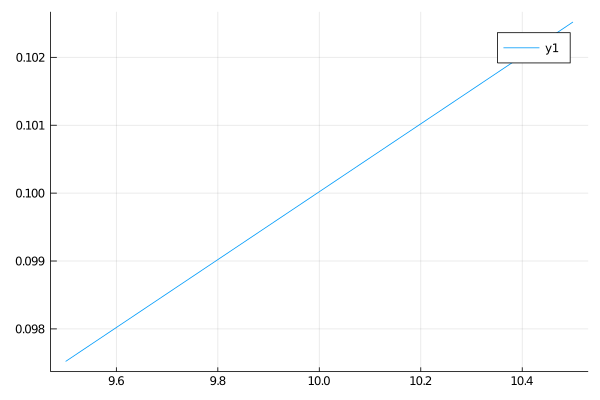

In [49]:
## Programa las función alfa_n como función del voltaje V.
## Necesitarás definir un caso especial cuando V - 10 < epsilon
## Utiliza esta celda para ver como se comporta tu función en esta vecindad
## y elegir un valor de epsilon adecuado

function alpha_n(V)
    epsilon = 0.000000001  
        
    if abs(V-10) < epsilon #definimos caso especial con valor absoluto, que es el análogo a distancia.
         return 0.1
    else
        return 0.01 * (10 - V) / (exp((10 - V) / 10) - 1)
    end

end


plot(alpha_n, 9.5:10.5)

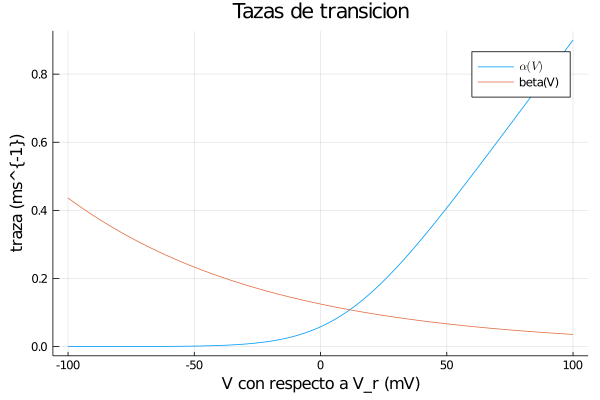

"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
latex: failed to create a dvi file
latex: failed to create a dvi file
latex: failed to create a dvi file


In [53]:
## Programa la funciones como función del voltaje V, para la compuerta de K
## Genera luego una gráfica de alfa_n y beta_n

function beta_n(V) 
    β_n = 0.125*ℯ^(-V/80)
    return β_n
end

V = -100:0.1:100
α = alpha_n.(V)
β = beta_n.(V)

plot(V, α, title="Tazas de transicion", xlabel="V con respecto a V_r (mV)", ylabel="traza (ms^{-1})", label=L"\alpha(V)")
plot!(V,β, label="beta(V)")

Las funciones para el **sodio (Na)** son:
\begin{align}
  \alpha_m(V) &= \frac{0.1(25 - V)}{e^{\left(\frac{25-V}{10}\right)} - 1}
\end{align}

\begin{align}
  \beta_m(V) &= 4 e^{-\frac{V}{18}}
\end{align}

\begin{align}
  \alpha_h(V) &= 0.07 e^{-\frac{V}{20}}
\end{align}

\begin{align}
  \beta_h(V) &= \frac{1}{e^{\left(\frac{30-V}{10}\right)} + 1}
\end{align}

Para $\alpha_m$ cuando $V = 25$, utilizamos la regla de L'Hopital para calcular el límite:
\begin{align}
  \alpha_m(25) = \frac{-0.1}{e^{\left(\frac{25-V}{10}\right)}(-0.1)} = \frac{-0.1}{-0.1} = 1
\end{align}

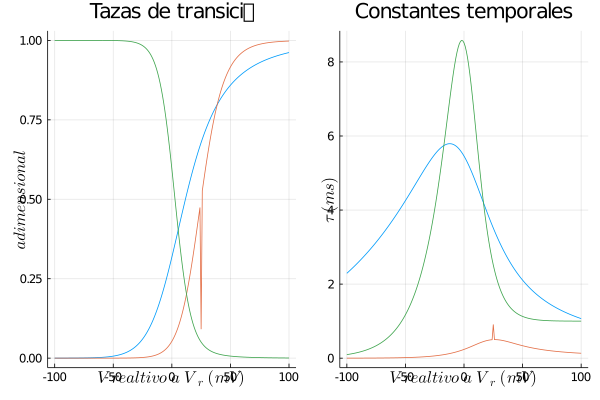

"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no

In [55]:
function alpha_m(V)
    epsilon = 0.0000000001  
        
    if abs.(V .- 25) < epsilon 
         return 0.1
    else
        return 0.1 * (25 .- V) ./ (exp.((25 .- V) ./ 10) .- 1)
    end
end

function beta_m(V)
    β_m = 4 * exp.(-(V ./ 18))
    return β_m
end

function alpha_h(V)
    return 0.07 * exp.(-V ./ 20)
end

function beta_h(V)
    return 1 ./ (exp.((30 .- V) ./ 10) .+ 1)
end

function tau_inf(alpha, beta)
    return 1 ./ (alpha .+ beta)
end

function n_inf(alpha, beta)
    return alpha ./ (alpha .+ beta)
end

function plotParameters()
    V = -100:100
    
    n_inf_n = n_inf(alpha_n.(V), beta_n.(V))
    tau_inf_n = tau_inf(alpha_n.(V), beta_n.(V))
    
    n_inf_m = n_inf(alpha_m.(V), beta_m.(V))
    tau_inf_m = tau_inf(alpha_m.(V), beta_m.(V))
    
    n_inf_h = n_inf(alpha_h.(V), beta_h.(V))
    tau_inf_h = tau_inf(alpha_h.(V), beta_h.(V))
    
    p1 = plot(
        V,
        [n_inf_n, n_inf_m, n_inf_h],
        label=[L"n_{\infty}(V)" L"m_{\infty}(V)" L"h_{\infty}(V)"]
    )
    
    p2 = plot(
        V,
        [tau_inf_n, tau_inf_m, tau_inf_h],
        label=[L"\tau_{n}(V)" L"\tau_{m}(V)" L"\tau_{h}(V)"]
    )
    
    plot(
        p1,
        p2,
        layout=(1, 2),
        title=["Tazas de transición" "Constantes temporales"],
        xlabel=[L"V\ realtivo\ a\ V_r\ (mV)" L"V\ realtivo\ a\ V_r\ (mV)"],
        ylabel=[L"adimensional" L"\tau\ (ms)"],
        legend=true
    )
end

function beta_n(V) 
    β_n = 0.125 * exp.(-V ./ 80)
    return β_n
end

function alpha_n(V)
    epsilon = 0.0000000001 
        
    if abs.(V .- 10) < epsilon 
         return 0.1
    else
        return 0.01 * (10 .- V) ./ (exp.((10 .- V) ./ 10) .- 1)
    end
end

plotParameters()


![tasas_constantes](figuras/tazas-y-constantes.jpg)

## Simulación con el método numérico de Euler

El método de Euler realiza una aproximación a la función por su tangente.  Dada una ecuación diferencial de la forma:

\begin{align}
  \frac{dy(t)}{dt} = f(y(t))
\end{align}

Partimos de un punto inicial $(t_0, y_0)$ y calculamos el valor de $y$ para el tiempo $t + \Delta t$ en dicho punto iterativamente como:

\begin{align}
  y(t + \Delta t) &= y(t) + \Delta t f(y(t))
\end{align}

El error aproximado por realizar esta aproximación es:
\begin{align}
  E =& \frac{1}{2} \frac{df(t)}{dt}(\Delta t)^2
\end{align}

Aplicando esta fórmula a la ecuación para los canales:

\begin{align}
 \frac{dn}{dt} &= \frac{n^{\infty}(V) - n}{\tau_n(V)}
\end{align}

Obtenemos:

\begin{align}
 n(t + \Delta t) =& n(t) + \Delta t \left[\frac{n^{\infty}(V)}{\tau_n} - \frac{n(t)}{\tau_n(V)} \right] \\
                 =& \left[ 1 - \frac{\Delta t}{\tau_n(V)} \right] n(t) + \frac{\Delta t}{\tau_n(V)}n^{\infty}(V)
\end{align}

Se obtienen fórmulas análogas para $m$ y $h$.  Todas juntas pueden ser escritas en forma matricial:

\begin{align}
  \begin{bmatrix}
  n(t + \Delta t) \\
  m(t + \Delta t) \\
  h(t + \Delta t)
  \end{bmatrix} =& 
  \begin{bmatrix}
  (1 - \Delta t/\tau_n(V)) & 0 & 0 \\
  0 & (1 - \Delta t/\tau_m(V)) & 0 \\
  0 & 0 & (1 - \Delta t/\tau_h(V)) \\
  \end{bmatrix}
  \begin{bmatrix}
  n(t) \\
  m(t) \\
  h(t)
  \end{bmatrix} +
  \begin{bmatrix}
  (\Delta t / \tau_n(V)) n^{\infty}(V) \\
  (\Delta t / \tau_m(V)) m^{\infty}(V) \\
  (\Delta t / \tau_h(V)) h^{\infty}(V)
  \end{bmatrix}
\end{align}

Brevemente:

\begin{align}
  \boldsymbol{\Pi}(t + \Delta t) =& \boldsymbol{A}_\pi \boldsymbol{\Pi}(t) + \boldsymbol{B}_\pi
\end{align}

Se debe realizar el mismo procedimiento con la ecuación diferencial para el voltaje.  Para simplificar la notación, introduzcamos:

\begin{align}
  G_{Na} = g_{Na}m^3h
\end{align}

\begin{align}
  G_{K} = g_K n^4
\end{align}

Entonces:
\begin{align}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) - g_L (V - E_L) + I_{ext} \\
 \frac{dV}{dt} &= -\frac{G_{Na}}{C_m}(V-E_{Na}) - \frac{G_K}{C_m} (V - E_K) - \frac{g_L}{C_m} (V - E_L) + \frac{1}{C_m}I_{ext}
\end{align}

Utilizando el método de Euler:

\begin{align}
 V(t + \Delta t) &= V(t) - \frac{\Delta t}{C_m} \left[ G_{Na}(V-E_{Na}) + G_K (V - E_K) + g_L (V - E_L) + I_{ext}(t) \right] \\
 V(t + \Delta t) &= V(t) - \Delta t \begin{bmatrix} \frac{G_{Na}}{C_m} & \frac{G_K}{C_m} & \frac{g_L}{C_m} \end{bmatrix}  \begin{bmatrix}
                 V(t)-E_{Na} \\
                 V(t)- E_K \\
                 V(t) - E_L
                \end{bmatrix} + \frac{\Delta t}{C_m}I_{ext}(t)
\end{align}

Para los valores por defecto propuestos en la celda siguiente, programar una simulación utilizando los resultados obtenidos con el método de Euler y produce la figura siguiente:

![simulacion](figuras/Simulacion.png)

    ¿Cuál es el algoritmo para resolver una EDO por el método de Euler?
    Hagamos una función para resolver EDOs por el método de Euler de manera general, después programamos las EDOs y graficamos.

In [36]:
function Euler(edo, p_ini, t)  #probemos haciendo una función del algoritmo, ésta función recibe la EDO, las condiciones iniciales y el tiempo para el que se resuelve dicha EDO.
    sol = zeros(length(t), length(p_ini)) #si bien, ésto no será necesario para nuestra implementación específica para HH, para probarlo, hacemos los siguientes pasos:
    #definimos un arreglo de dimensiones de t, que es un arreglo.
    sol[1, :] = p_ini #definimos la primera entrada como las condiciones iniciales, que son parte de la solución.
    delta = t[2] - t[1] #definimos la delta t, aunque para el modelo HH ya nos la dan :)
    for i in 1:length(t)-1 #definimos la ieración
        sol[i+1, :] = sol[i, :] + delta * edo(sol[i, :], t[i]) #ÉSTE ES EL MÉTODO DE EULER, ÉSTE USAREMOS PARA RESOLVER HH.
    end
    return sol #devuelve un arreglo con las soluciones para cada t.
end

Euler (generic function with 1 method)

In [7]:
function modelo_exp(P, t, a=0.1) #definimos una EDO sencilla como ejemplo, para ver que nuestro método de Euler funciona.
    return a * P
end


modelo_exp (generic function with 2 methods)

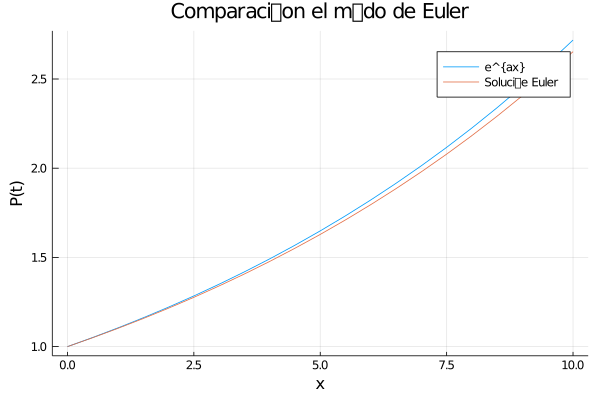

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [37]:
tiempo = 0:0.5:10
solucion = Euler(modelo_exp, [1], tiempo) #probamos nuestro algoritmo 

plot(tiempo, exp.(0.1 .* tiempo), label = "e^{ax}") #lo comparamos con la solución analítica que sabemos que ya tiene
plot!(tiempo, solucion, label = "Algoritmo de Euler")
title!("Comparación algoritmo Euler")
xlabel!("x")
ylabel!("P(t)")

plot(tiempo, exp.(0.1 .* tiempo), label = "e^{ax}")
plot!(tiempo, solucion, label = "Solución de Euler")
title!("Comparación con el método de Euler")
xlabel!("x")
ylabel!("P(t)")



Vemos que el algoritmo sí funciona, y aproxima a la solución de la EDO decentemente, ahora, apliquémosla para resolver la simulación del modelo HH.

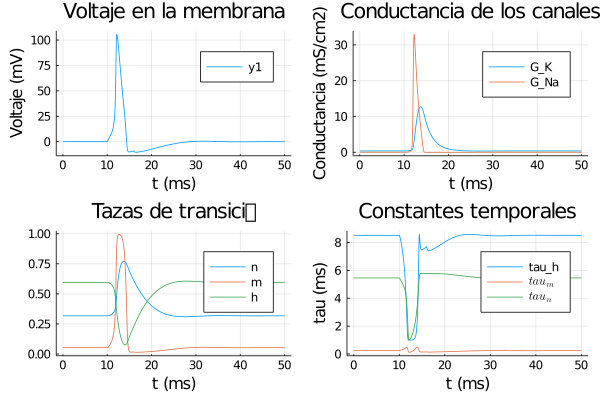

"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: chara

In [44]:
#Definimos las constantes que venían en el diccionario.
const DeltaT = 0.01  # ms
const maxT = 50.0  # ms
const V0 = 0.0  # mV
const gNa = 120.0  # mS/cm2
const gK = 36.0
const gL = 0.3
const Cm = 1.0  # micro F/cm2
const ENa = 115.0  # Utilizando la convensión original de Hodkin-Huxley
const EK = -12.0
const EL = 10.613

#Definimos las funciones auxiliares, que no están explicitamente en el modelo.


function beta_m(V)
    β_m = 4 * exp(-(V / 18))
    return β_m
end

function alpha_h(V)
    return 0.07 * exp(-V / 20)
end

function beta_h(V)
    return 1 / (exp((30 - V) / 10) + 1)
end

function tau_inf(alpha, beta)
    return 1 / (alpha + beta)
end

function n_inf(alpha, beta)
    return alpha / (alpha + beta)
end


#Definimos toda nuestra simulación en una misma función.

function simulaHodkinHuxley(V0, t0, tfin, current) #La dejamos que tome esos parámetros para que no sea necesario un paso adicional.
    # Se usarán las funciones previamente definidas
    # Adicionalmente se definieron n_inf para n, m y h
    
    function n_inf_n(V)
        return n_inf(alpha_n(V), beta_n(V))
    end
    
    function n_inf_m(V)
        return n_inf(alpha_m(V), beta_m(V))
    end
    
    function n_inf_h(V)
        return n_inf(alpha_h(V), beta_h(V))
    end
    
    # Aprovechamos la función de corriente proporcionada
    function Iext(t)
        """Devuelve el valor de la corriente aplicada a la membrana, al tiempo t, en microamperes."""
        if t0 < t < tfin
            return current  # micro A/cm2
        else
            return 0
        end
    end
    
    # Definimos las EDOs que conforman el modelo
    function HodkinHuxley(u, t) #las definimos todas juntas.
        n, m, h, V = u
        Vdif = V - V0
        #Conductancias
        G_K = gK * (n^4.0)  
        G_Na = gNa * (m^3.0) * h  

        dn = alpha_n(Vdif) * (1 - n) - beta_n(Vdif) * n
        dm = alpha_m(Vdif) * (1 - m) - beta_m(Vdif) * m
        dh = alpha_h(Vdif) * (1 - h) - beta_h(Vdif) * h
        # EDO para el voltaje
        dV = (Iext(t) + (ENa - V) * G_Na + (EK - V) * G_K + (EL - V) * gL) / Cm

        return [dn, dm, dh, dV] #regresa un arreglo de todas las EDOs a resolver
    end
    
    
    p_ini = [n_inf_n(V0), n_inf_m(V0), n_inf_h(V0), V0] #condiciones iniciales para cada EDO
    tiempo = 0:DeltaT:maxT
    solucion = zeros(length(tiempo), 4) #definimos el arreglo donde se guardarán las soluciones, marcamos sus dimensiones, análogo al procedimiento que mencionamos antes, cuando lo probamos.
    solucion[1, :] = p_ini #ponemos la primera entrada, corresponde a las condiciones iniciales
    for i in 2:length(tiempo)
        solucion[i, :] = solucion[i - 1, :] + DeltaT * HodkinHuxley(solucion[i - 1, :], tiempo[i - 1]) #aplicamos algoritmo de Euler
    end
    

#Ya tenemos las soluciones ordenadas dentro de solucion, utilizaremos las posiciones para definir las funciones que dependen de las soluciones.

    # Definimos las transiciones
    G_K_s = gK * solucion[:, 1].^4
    G_Na_s = gNa * solucion[:, 2].^3 .* solucion[:, 3]

    # Definimos las constantes temporales
    tau_h_s = [tau_inf(alpha_h(V), beta_h(V)) for V in solucion[:, 4]]
    tau_m_s = [tau_inf(alpha_m(V), beta_m(V)) for V in solucion[:, 4]]
    tau_n_s = [tau_inf(alpha_n(V), beta_n(V)) for V in solucion[:, 4]]
    
    
    p1 = plot(tiempo, solucion[:, 4], xlabel="t (ms)", ylabel="Voltaje (mV)", title="Voltaje en la membrana")
    p2 = plot(tiempo, G_K_s, label="G_K", xlabel="t (ms)", ylabel="Conductancia (mS/cm2)", title="Conductancia de los canales")
    plot!(tiempo, G_Na_s, label="G_Na")
    p3 = plot(tiempo, solucion[:, 1], label="n", xlabel="t (ms)", title="Tazas de transición")
    plot!(tiempo, solucion[:, 2], label="m")
    plot!(tiempo, solucion[:, 3], label="h")
    p4 = plot(tiempo, tau_h_s, label="tau_h", xlabel="t (ms)", ylabel="tau (ms)", title="Constantes temporales")
    plot!(tiempo, tau_m_s, label=L"tau_m")
    plot!(tiempo, tau_n_s, label=L"tau_n")
    
    plot(p1, p2, p3, p4)
end #termina la definición de la simulación

simulaHodkinHuxley(0.0, 10.0, 16.0, 10) #Probamos nuestra simulación


# Comentarios y resultados


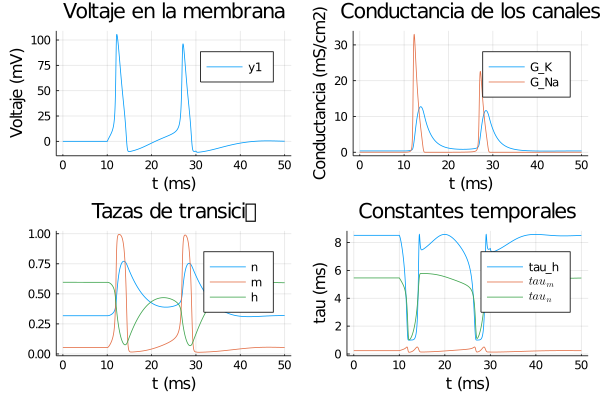

"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: chara

In [48]:
# Después prueba con pulsos de t en 10->30, con corrientes de 10 y -10 microamperes
# ¿Qué observas?

simulaHodkinHuxley(0, 10.0, 30.0, 10) 


Obtenemos dos potenciales de acción bajo ese intervalo de tiempo, vemos que las curvas coinciden con el modelo original. Bajo corrientes negativas, el comportamiento cambia y las corrientes se comportan totalmente diferente, pero podemos decir que la conductancia se mantiene.

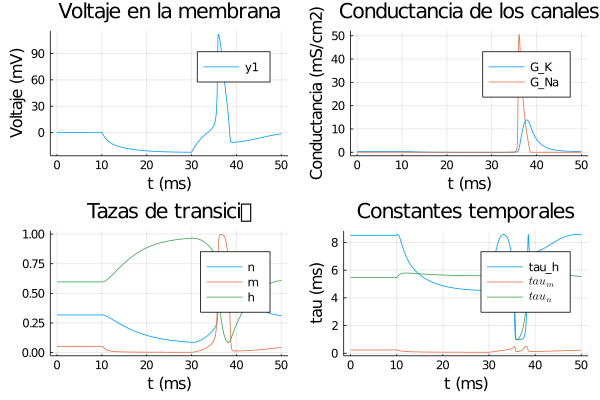

"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: chara

In [46]:

simulaHodkinHuxley(0.0, 10.0, 30.0, -10) 